In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%cd '/content/drive/My Drive/Kaggle/Walmart-M5-Accuracy/Data'

/content/drive/My Drive/Kaggle/Walmart-M5-Accuracy/Data


In [ ]:
!ls

calendar.csv		    sales_train_validation.csv	sell_prices.csv
sales_train_evaluation.csv  sample_submission.csv


# Sales Data

In [ ]:
train_sales_df = pd.read_csv('/content/drive/My Drive/Kaggle/Walmart-M5-Accuracy/Data/sales_train_validation.csv')

In [ ]:
train_sales_df.shape

(30490, 1919)

In [ ]:
train_sales_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [ ]:
# date columns

date_cols = train_sales_df.iloc[:,6:]

In [ ]:
# separating non-time series columns

non_time_series_cols = train_sales_df[['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']]

In [ ]:
non_time_series_cols.head()

,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA


In [ ]:
non_time_series_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   30490 non-null  object
 1   dept_id   30490 non-null  object
 2   cat_id    30490 non-null  object
 3   store_id  30490 non-null  object
 4   state_id  30490 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


Decision : Non-time series columns do not have null value

item_id

In [ ]:
train_sales_df.item_id.unique()

array(['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', ...,
       'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827'], dtype=object)

In [ ]:
# number of unique items

len(train_sales_df.item_id.unique())

3049

store_id

In [ ]:
train_sales_df.store_id.unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [ ]:
# number of unique stores

len(train_sales_df.store_id.unique())

10

**Decision**: There are 3049 unique items and 10 unique stores.

And unique id in the sales table is a combination of item id and store id

*Thus each row in the table represents 1 unique sales record for an item-store combination*

In [ ]:
# validation of decision:

len(train_sales_df.id.unique())

30490

dept_id

In [ ]:
train_sales_df.dept_id.unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [ ]:
# number of unique depts

len(train_sales_df.dept_id.unique())

7

cat_id

In [ ]:
train_sales_df.cat_id.unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [ ]:
# number of unique categories

len(non_time_series_cols.cat_id.unique())

3

state_id

In [ ]:
train_sales_df.state_id.unique()

array(['CA', 'TX', 'WI'], dtype=object)

In [ ]:
# number of unique states

len(train_sales_df.state_id.unique())

3

In [ ]:
# number of rows for each state

train_sales_df.state_id.value_counts()

CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64

In [ ]:
# percentage distribution

train_sales_df.state_id.value_counts(normalize =True) 

CA    0.4
TX    0.3
WI    0.3
Name: state_id, dtype: float64

Row wise(per item per store) total sale 

In [ ]:
train_sales_df['sales_total'] = train_sales_df.iloc[:, 6:].sum(axis=1)


In [ ]:
train_sales_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,sales_total
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1,600
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,493
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1,288
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2,3288
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4,1849


In [ ]:
train_sales_df.sales_total.describe()

count     30490.000000
mean       2154.654280
std        5217.226438
min          10.000000
25%         355.000000
50%         848.000000
75%        2031.750000
max      250502.000000
Name: sales_total, dtype: float64

State wise sale

In [ ]:
#State wise total sale

train_sales_df.groupby('state_id').agg({"sales_total":"sum"})

,sales_total
state_id,
CA,28675547
TX,18899006
WI,18120856


In [ ]:
#Calculating the sales ratio
state_wise_sales_data = train_sales_df.groupby('state_id').agg({"sales_total":"sum"})/train_sales_df.sales_total.sum() * 100

In [ ]:
# resetting index was required else error occured during plotting and the output was blank 

state_wise_sales_data = state_wise_sales_data.reset_index()
state_wise_sales_data

,state_id,sales_total
0,CA,43.649240
1,TX,28.767621
2,WI,27.583139


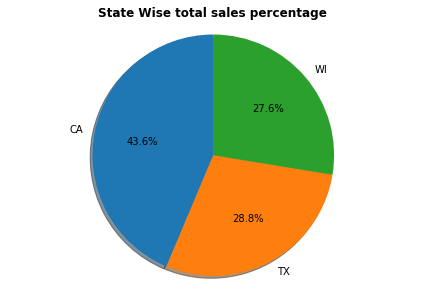

In [ ]:
#Plotting the sales ratio across the states

fig1, ax1 = plt.subplots()
ax1.pie(state_wise_sales_data['sales_total'],labels= state_wise_sales_data['state_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title("State Wise total sales percentage",fontweight = "bold")
plt.show()

Store wise sale

In [ ]:
#Store wise total sale

train_sales_df.groupby('store_id').agg({"sales_total":"sum"})

,sales_total
store_id,
CA_1,7698216
CA_2,5685475
CA_3,11188180
CA_4,4103676
TX_1,5595292
TX_2,7214384
TX_3,6089330
WI_1,5149062
WI_2,6544012


In [ ]:
#Calculating the sales ratio
store_wise_sales_data = train_sales_df.groupby('store_id').agg({"sales_total":"sum"})/train_sales_df.sales_total.sum() * 100

In [ ]:
store_wise_sales_data = store_wise_sales_data.reset_index()
store_wise_sales_data

,store_id,sales_total
0,CA_1,11.718043
1,CA_2,8.654296
2,CA_3,17.030383
3,CA_4,6.246519
4,TX_1,8.517021
5,TX_2,10.981565
6,TX_3,9.269034
7,WI_1,7.837781
8,WI_2,9.961141
9,WI_3,9.784218


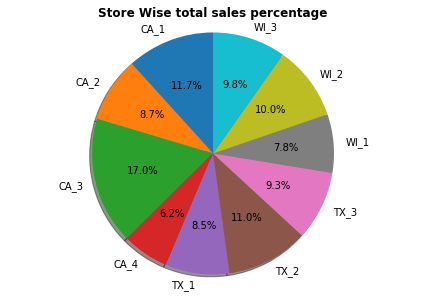

In [ ]:
#Plotting the sales ratio across the stores

fig1, ax1 = plt.subplots()
ax1.pie(store_wise_sales_data['sales_total'],labels= store_wise_sales_data['store_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title("Store Wise total sales percentage",fontweight = "bold")
plt.show()

Category wise sale

In [ ]:
#Category wise total sale

train_sales_df.groupby('cat_id').agg({"sales_total":"sum"})

,sales_total
cat_id,
FOODS,45089939
HOBBIES,6124800
HOUSEHOLD,14480670


In [ ]:
#Calculating the sales ratio
cat_wise_sales_data = train_sales_df.groupby('cat_id').agg({"sales_total":"sum"})/train_sales_df.sales_total.sum() * 100

In [ ]:
cat_wise_sales_data = cat_wise_sales_data.reset_index()
cat_wise_sales_data

,cat_id,sales_total
0,FOODS,68.634840
1,HOBBIES,9.323026
2,HOUSEHOLD,22.042134


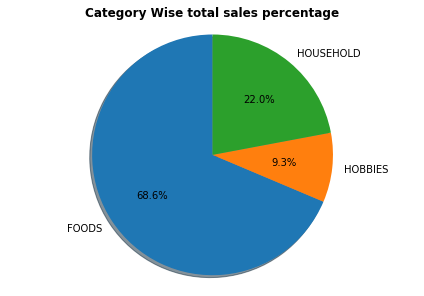

In [ ]:
#Plotting the sales ratio across the categories

fig1, ax1 = plt.subplots()
ax1.pie(cat_wise_sales_data['sales_total'],labels= cat_wise_sales_data['cat_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title("Category Wise total sales percentage",fontweight = "bold")
plt.show()

Department wise sale

In [ ]:
#Department wise total sale

train_sales_df.groupby('dept_id').agg({"sales_total":"sum"})

,sales_total
dept_id,
FOODS_1,5088041
FOODS_2,7629822
FOODS_3,32372076
HOBBIES_1,5596460
HOBBIES_2,528340
HOUSEHOLD_1,11500526
HOUSEHOLD_2,2980144


In [ ]:
#Calculating the sales ratio
dept_wise_sales_data = train_sales_df.groupby('dept_id').agg({"sales_total":"sum"})/train_sales_df.sales_total.sum() * 100

In [ ]:
dept_wise_sales_data = dept_wise_sales_data.reset_index()
dept_wise_sales_data

,dept_id,sales_total
0,FOODS_1,7.744896
1,FOODS_2,11.613935
2,FOODS_3,49.276010
3,HOBBIES_1,8.518799
4,HOBBIES_2,0.804227
5,HOUSEHOLD_1,17.505829
6,HOUSEHOLD_2,4.536305


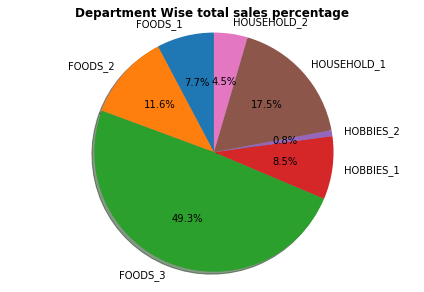

In [ ]:
#Plotting the sales ratio across the departments

fig1, ax1 = plt.subplots()
ax1.pie(dept_wise_sales_data['sales_total'],labels= dept_wise_sales_data['dept_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title("Department Wise total sales percentage",fontweight = "bold")
plt.show()

In [ ]:
#Calculating the sales ratio
#store_dept_wise_sales_data = train_sales_df.groupby(['store_id','dept_id']).agg({"sales_total":"sum"})/train_sales_df.sales_total.sum() * 100

store_dept_wise_sales_data = train_sales_df.groupby(['store_id','dept_id']).agg({"sales_total":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

In [ ]:
store_dept_wise_sales_data 

sales_total                        ...                                  
dept_id      FOODS_1    FOODS_2    FOODS_3  ... HOBBIES_2 HOUSEHOLD_1 HOUSEHOLD_2
store_id                                    ...                                  
CA_1        7.376371  11.498041  51.022666  ...  0.716452   14.291168    4.423687
CA_2       12.623167   5.852088  42.737907  ...  1.046878   19.468066    8.100660
CA_3        6.586076  10.748540  49.841547  ...  0.674185   19.190548    5.044341
CA_4        8.371275  13.093504  47.240084  ...  0.550653   12.937790    4.602483
TX_1        6.535066  11.286507  49.703215  ...  0.769576   20.478574    4.327978
TX_2        7.048641  10.831999  51.634984  ...  1.044109   17.384977    4.283720
TX_3        6.757065  12.385139  49.224726  ...  1.105064   19.053607    3.920743
WI_1        9.840666  11.668028  45.267585  ...  0.923916   15.981066    4.508375
WI_2        8.113585  16.696776  48.052953  ...  0.637560   18.562283    2.917110
WI_3        6.204706  12.624853  54.767834  ...  0.632691   15.831682    3.310753

[10 rows x 7 columns]

In [ ]:
store_dept_wise_sales_data.describe()

sales_total                        ...                                   
dept_id     FOODS_1    FOODS_2    FOODS_3  ...  HOBBIES_2 HOUSEHOLD_1 HOUSEHOLD_2
count     10.000000  10.000000  10.000000  ...  10.000000   10.000000   10.000000
mean       7.945662  11.668547  48.949350  ...   0.810108   17.317976    4.543985
std        1.974564   2.672786   3.377519  ...   0.202272    2.472695    1.398009
min        6.204706   5.852088  42.737907  ...   0.550653   12.937790    2.917110
25%        6.628823  10.945626  47.443301  ...   0.646716   15.869028    4.011487
50%        7.212506  11.583034  49.463970  ...   0.743014   17.973630    4.375833
75%        8.306853  12.564924  50.727386  ...   1.014060   19.156312    4.578956
max       12.623167  16.696776  54.767834  ...   1.105064   20.478574    8.100660

[8 rows x 7 columns]

In [ ]:
dept_store_wise_sales_data = train_sales_df.groupby(['dept_id', 'store_id']).agg({"sales_total":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

In [ ]:
dept_store_wise_sales_data

sales_total                        ...                                 
store_id           CA_1       CA_2       CA_3  ...       WI_1       WI_2       WI_3
dept_id                                        ...                                 
FOODS_1       11.160464  14.105370  14.482234  ...   9.958685  10.435333   7.838479
FOODS_2       11.601109   4.360770  15.761390  ...   7.874286  14.320636  10.635871
FOODS_3       12.133405   7.506015  17.225840  ...   7.200206   9.713900  10.874672
HOBBIES_1     14.679351  10.333014  15.822824  ...  10.866208   5.869639   7.611955
HOBBIES_2     10.439111  11.265473  14.276602  ...   9.004240   7.896809   7.697316
HOUSEHOLD_1    9.566215   9.624360  18.669346  ...   7.155108  10.562282   8.848517
HOUSEHOLD_2   11.427132  15.454320  18.937675  ...   7.789523   6.405597   7.140863

[7 rows x 10 columns]

In [ ]:
dept_store_wise_sales_data.describe()

sales_total                        ...                                 
store_id        CA_1       CA_2       CA_3  ...       WI_1       WI_2       WI_3
count       7.000000   7.000000   7.000000  ...   7.000000   7.000000   7.000000
mean       11.572398  10.378475  16.453702  ...   8.549751   9.314885   8.663953
std         1.605647   3.774371   1.878792  ...   1.435162   2.897492   1.519435
min         9.566215   4.360770  14.276602  ...   7.155108   5.869639   7.140863
25%        10.799788   8.565188  15.121812  ...   7.494864   7.151203   7.654635
50%        11.427132  10.333014  15.822824  ...   7.874286   9.713900   7.838479
75%        11.867257  12.685421  17.947593  ...   9.481463  10.498807   9.742194
max        14.679351  15.454320  18.937675  ...  10.866208  14.320636  10.874672

[8 rows x 10 columns]

**Decision:**

1. State wise CA has highest sales (more than 40%) and remaining is almost equally distributed between TX and WI

2. Store wise CA_3 has highest sales (17%) and CA_4 is lowest (6%) of which Food_3 sold the most and Hobbies_2 sold the least in both the stores

3. Category wise sale of 'Food' is highest and 'Hobbies' is lowest(9%)

4. Department wise sale of 'Foods_3' is highest(almost 50%) and 'Household_2' is lowest(4.5%)

5. Store CA_2 has highest percentage share in sale for: Foods_1 and Household_2 while at the same time lowest percentage share for the sale of: Foods_2 and Foods_3

# Price Data

In [ ]:
price_df = pd.read_csv('/content/drive/My Drive/Kaggle/Walmart-M5-Accuracy/Data/sell_prices.csv')

In [ ]:
price_df.shape

(6841121, 4)

In [ ]:
price_df.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


Finding min and max price for each item-store combination and difference between max and min price

In [ ]:
item_store_prices = price_df.groupby(["item_id","store_id"]).agg({"sell_price":["max","min"]})

In [ ]:
item_store_prices.head()

sell_price      
                            max   min
item_id     store_id                 
FOODS_1_001 CA_1           2.24  2.00
            CA_2           2.24  2.00
            CA_3           2.24  1.75
            CA_4           2.24  2.00
            TX_1           2.24  0.99

In [ ]:
item_store_prices.columns = ['sell_price_max', 'sell_price_min']

In [ ]:
item_store_prices.head()

sell_price_max  sell_price_min
item_id     store_id                                
FOODS_1_001 CA_1                2.24            2.00
            CA_2                2.24            2.00
            CA_3                2.24            1.75
            CA_4                2.24            2.00
            TX_1                2.24            0.99

In [ ]:
item_store_prices["price_change"] = item_store_prices["sell_price_max"] - item_store_prices["sell_price_min"]

In [ ]:
item_store_prices.head()

sell_price_max  sell_price_min  price_change
item_id     store_id                                              
FOODS_1_001 CA_1                2.24            2.00          0.24
            CA_2                2.24            2.00          0.24
            CA_3                2.24            1.75          0.49
            CA_4                2.24            2.00          0.24
            TX_1                2.24            0.99          1.25

In [ ]:
item_store_prices_sorted = item_store_prices.sort_values(["price_change","item_id"],ascending=False).reset_index()

In [ ]:
item_store_prices_sorted["category"] = item_store_prices_sorted["item_id"].str.split("_",expand = True)[0]

In [ ]:
item_store_prices_sorted["department"] = item_store_prices_sorted["item_id"].str[:-4]

In [ ]:
item_store_prices_sorted.head()

,item_id,store_id,sell_price_max,sell_price_min,price_change,category,department
0,HOUSEHOLD_2_406,WI_3,107.32,3.26,104.06,HOUSEHOLD,HOUSEHOLD_2
1,HOUSEHOLD_2_406,WI_2,61.46,12.46,49.00,HOUSEHOLD,HOUSEHOLD_2
2,HOUSEHOLD_2_466,TX_1,52.62,6.46,46.16,HOUSEHOLD,HOUSEHOLD_2
3,HOUSEHOLD_2_178,TX_1,44.36,3.00,41.36,HOUSEHOLD,HOUSEHOLD_2
4,HOUSEHOLD_2_250,WI_2,34.18,3.36,30.82,HOUSEHOLD,HOUSEHOLD_2


In [ ]:
# Top 3500 rows(~top 10%) ordered by price_change column

item_store_prices_sorted_high_diff = item_store_prices_sorted.nlargest(3500,['price_change'])

In [ ]:
item_store_prices_sorted_high_diff.category.value_counts()[:3].sort_values(ascending=False)

FOODS        1525
HOUSEHOLD    1355
HOBBIES       620
Name: category, dtype: int64

In [ ]:
item_store_prices_sorted_high_diff.department.value_counts()[:5].sort_values(ascending=False)

FOODS_3        722
HOUSEHOLD_2    709
HOUSEHOLD_1    646
FOODS_2        558
HOBBIES_1      511
Name: department, dtype: int64

In [ ]:
# Bottom 3500 rows (10%) ordered by price_change column

item_store_prices_sorted_low_diff = item_store_prices_sorted.iloc[-3500:,:]

In [ ]:
item_store_prices_sorted_low_diff.head()

,item_id,store_id,sell_price_max,sell_price_min,price_change,category,department
26990,HOBBIES_1_228,CA_1,6.87,6.87,0.0,HOBBIES,HOBBIES_1
26991,HOBBIES_1_228,CA_2,6.87,6.87,0.0,HOBBIES,HOBBIES_1
26992,HOBBIES_1_228,CA_3,6.87,6.87,0.0,HOBBIES,HOBBIES_1
26993,HOBBIES_1_228,CA_4,6.87,6.87,0.0,HOBBIES,HOBBIES_1
26994,HOBBIES_1_228,TX_1,6.87,6.87,0.0,HOBBIES,HOBBIES_1


In [ ]:
item_store_prices_sorted_low_diff.tail()

,item_id,store_id,sell_price_max,sell_price_min,price_change,category,department
30485,FOODS_1_014,TX_2,0.98,0.98,0.0,FOODS,FOODS_1
30486,FOODS_1_014,TX_3,0.98,0.98,0.0,FOODS,FOODS_1
30487,FOODS_1_014,WI_1,0.98,0.98,0.0,FOODS,FOODS_1
30488,FOODS_1_014,WI_2,0.98,0.98,0.0,FOODS,FOODS_1
30489,FOODS_1_014,WI_3,0.98,0.98,0.0,FOODS,FOODS_1


In [ ]:
item_store_prices_sorted_low_diff.price_change.value_counts()

0.0    3500
Name: price_change, dtype: int64

In [ ]:
item_store_prices_sorted_low_diff.category.value_counts()

FOODS      2907
HOBBIES     593
Name: category, dtype: int64

**Decision:**

Maximum price change for a particular product has been seen for product : Household_2 in store: WI_3

Household_2 is the department for which high price change has been observed in second highest number of stores

Foods_3 is the department for which high price change has been observed in highest number of stores

Category wise Foods has price change across highest number of stores

Again items in Foods category are the ones which shows no change in price in highest number of stores






**Weekwise** analysis of **max** price for each item-store combination

In [ ]:
price_df_max = price_df.copy()

In [ ]:
idx = price_df_max.groupby(["item_id", "store_id"])['sell_price'].idxmax().tolist()
price_df_max = price_df_max.loc[idx]

In [ ]:
price_df_max.head()

,store_id,item_id,wm_yr_wk,sell_price
368829,CA_1,FOODS_1_001,11232,2.24
1065190,CA_2,FOODS_1_001,11232,2.24
1700529,CA_3,FOODS_1_001,11232,2.24
2385189,CA_4,FOODS_1_001,11232,2.24
3077030,TX_1,FOODS_1_001,11232,2.24


In [ ]:
price_df_max.wm_yr_wk.value_counts()[:5].sort_values(ascending=False)

11101    3617
11102     499
11606     462
11206     299
11429     298
Name: wm_yr_wk, dtype: int64

Decision:

Max price has been observed mostly on the wm_week 11101

**Weekwise** analysis of **min** price for each item-store combination

In [ ]:
price_df_min = price_df.copy()

In [ ]:
idx = price_df_min.groupby(["item_id", "store_id"])['sell_price'].idxmin().tolist()
price_df_min = price_df_min.loc[idx]

In [ ]:
price_df_min.head()

,store_id,item_id,wm_yr_wk,sell_price
368746,CA_1,FOODS_1_001,11101,2.00
1065107,CA_2,FOODS_1_001,11101,2.00
1700484,CA_3,FOODS_1_001,11139,1.75
2385106,CA_4,FOODS_1_001,11101,2.00
3077115,TX_1,FOODS_1_001,11412,0.99


In [ ]:
price_df_min.wm_yr_wk.value_counts()[:5].sort_values(ascending=False)

11101    5089
11102     579
11103     400
11425     275
11424     250
Name: wm_yr_wk, dtype: int64

Decision:

Min price has been observed mostly on the wm_week 11101

wm_week 11101 is a week of interest as count of items having max price as well as count of items having min price have been obsered in this week.

# Calender Data

In [ ]:
calender_df = pd.read_csv('/content/drive/My Drive/Kaggle/Walmart-M5-Accuracy/Data/calendar.csv')

In [ ]:
calender_df.shape

(1969, 14)

In [ ]:
calender_df.head(8)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1


In [ ]:
# random check for wm_yr_wk for specific dates
array = ['2011-12-31', '2012-01-01']
calender_df.loc[calender_df['date'].isin(array)]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
336,2011-12-31,11149,Saturday,1,12,2011,d_337,NaN,NaN,NaN,NaN,0,0,0
337,2012-01-01,11149,Sunday,2,1,2012,d_338,NewYear,National,NaN,NaN,1,1,0


In [ ]:
events1 = calender_df[['event_name_1','event_type_1',]]

In [ ]:
events2 = calender_df[['event_name_2','event_type_2',]]

In [ ]:
events2.columns

Index(['event_name_1', 'event_type_1'], dtype='object')

In [ ]:
events = pd.concat([events1,events2],ignore_index = True)

In [ ]:
events.shape

(3938, 2)

In [ ]:
events = events.dropna().drop_duplicates()

In [ ]:
events.shape

(30, 2)

In [ ]:
events.columns = ['event_name', 'event_type']

In [ ]:
events

,event_name,event_type
8,SuperBowl,Sporting
16,ValentinesDay,Cultural
23,PresidentsDay,National
39,LentStart,Religious
46,LentWeek2,Religious
47,StPatricksDay,Cultural
50,Purim End,Religious
85,OrthodoxEaster,Religious
87,Pesach End,Religious
96,Cinco De Mayo,Cultural


In [ ]:
events.event_type.value_counts()

Religious    10
National     10
Cultural      7
Sporting      3
Name: event_type, dtype: int64

Decision:

WM has 10 National and Religious events, 7 Cultural Events and 3 Sporting events (30 events in total) in a year

SNAP analysis

SNAP days are those days of the month when food items are being sold at subsidised rate to the low-income group people

In [ ]:
snap_days = calender_df.groupby(['year','month'])['snap_CA','snap_TX','snap_WI'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
snap_days.pivot(index="month",columns = "year",values = ["snap_CA","snap_TX","snap_WI"])

snap_CA                          ... snap_WI                        
year     2011  2012  2013  2014  2015  ...    2012  2013  2014  2015  2016
month                                  ...                                
1         0.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0  10.0
2        10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0  10.0
3        10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0  10.0
4        10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0  10.0
5        10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0  10.0
6        10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0  10.0
7        10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0   NaN
8        10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0   NaN
9        10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0   NaN
10       10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0   NaN
11       10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0   NaN
12       10.0  10.0  10.0  10.0  10.0  ...    10.0  10.0  10.0  10.0   NaN

[12 rows x 18 columns]

Decision:

So every month has 10 SNAP days for all the 3 states and it has been consistent througout the years except for 2016 which might fall on different days in different states.

In 2016, there was no SNAP day in any of the stores in those 3 states since July.

Identifying on which specific days of months(calender month) stores in these three states had snap days

In [ ]:
calender_df_date_seg = calender_df.copy()

In [ ]:
calender_df_date_seg['cal_year_month'] = calender_df['date'].str[:-3]

In [ ]:
calender_df_date_seg['cal_date'] = calender_df['date'].str[-2:]

In [ ]:
calender_df_date_seg.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,cal_year_month,cal_date
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,2011-01,29
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,2011-01,30
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,2011-01,31
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,2011-02,01
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,2011-02,02


Identifying snap days for CA stores

In [ ]:
CA_snap_dates = calender_df_date_seg.groupby('cal_date').agg({"snap_CA":"sum"}).reset_index()
CA_snap_dates.loc[CA_snap_dates['snap_CA']!=0]

,cal_date,snap_CA
0,01,65
1,02,65
2,03,65
3,04,65
4,05,65
5,06,65
6,07,65
7,08,65
8,09,65
9,10,65


Identifying snap days for TX stores

In [ ]:
TX_snap_dates = calender_df_date_seg.groupby('cal_date').agg({"snap_TX":"sum"}).reset_index()
TX_snap_dates.loc[TX_snap_dates['snap_TX']!=0]

,cal_date,snap_TX
0,01,65
2,03,65
4,05,65
5,06,65
6,07,65
8,09,65
10,11,65
11,12,65
12,13,65
14,15,65


Identifying snap days for WI stores

In [ ]:
WI_snap_dates = calender_df_date_seg.groupby('cal_date').agg({"snap_WI":"sum"}).reset_index()
WI_snap_dates.loc[WI_snap_dates['snap_WI']!=0]

,cal_date,snap_WI
1,02,65
2,03,65
4,05,65
5,06,65
7,08,65
8,09,65
10,11,65
11,12,65
13,14,65
14,15,65


Decision:

State wise these snap days fall on fixed days of calender months however these fixed dates differ state to state.

Also, as on the snap days food items are being sold to lower income group people at subsidised rate, we can expect to see rise in the sales of food items on these days.

Detailed analysis of the same can be done during time series data analysis.